<a href="https://colab.research.google.com/github/ShawnTayNWU/MSDS460/blob/Assignments/MSDS_460_Ass_2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Question 3


A catering company must have the following number of clean napkins available at the beginning of each of the next four days:  day 1: 15, day 2: 12, day 3: 18, and day 4: 6.  After being used, a napkin can be cleaned by one of two methods: fast service or slow service. Fast service costs 0.10 per napkin, and a napkin cleaned via fast service is available for use the day after it is last used.  Slow service costs 0.06 per napkin, and a napkin cleaned via slow service is available two days after they were last used.  New napkins can be purchased for a cost of 0.20 per napkin.

Part A:  Formulate the problem as a minimum cost transportation problem. 

Part B:  Solve the problem (provide exact values for all variables and the optimal objective function).




## 1. Import Packages

#### Only for Google Colab: Need to install non standard package each time

In [1]:
!pip install pulp #Run this only the first time, no need to install each time

     |████████████████████████████████| 14.2 MB 17.2 MB/s 


#### Import Libraries

In [2]:
# import the library pulp as p
import pulp as p
import pandas as pd

# import pulp
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK
# Note, you may need to conda install or pip install GLPK

# Sensitivity Analysis File and Model (lp) file will output
# to your working directory.


## 2. Define variables, problem, objective function and constraints







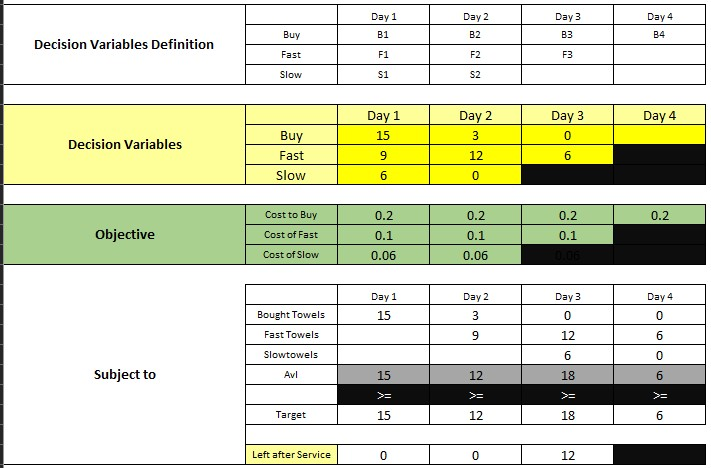

In [3]:
 # Create a LP Minimization problem
Lp_prob = p.LpProblem('Problem', p.LpMinimize) 
  
# Create problem Variables 
B1 = p.LpVariable("B1", lowBound = 0, cat='Integer')  # Towels bought on Day 1
B2 = p.LpVariable("B2", lowBound = 0, cat='Integer')  # Towels bought on Day 2
B3 = p.LpVariable("B3", lowBound = 0, cat='Integer')  # Towels bought on Day 3
B4 = p.LpVariable("B4", lowBound = 0, cat='Integer')  # Towels bought on Day 4
F1 = p.LpVariable("F1", lowBound = 0, cat='Integer')  # Towels using fast service on Day 1
F2 = p.LpVariable("F2", lowBound = 0, cat='Integer')  # Towels using fast service on Day 2
F3 = p.LpVariable("F3", lowBound = 0, cat='Integer')  # Towels using fast service on Day 3
S1 = p.LpVariable("S1", lowBound = 0, cat='Integer')  # Towels using slow service on Day 1
S2 = p.LpVariable("S2", lowBound = 0, cat='Integer')  # Towels using slow service on Day 2
  
# Objective Function
Lp_prob += (0.2*(B1+B2+B3+B4)) + (0.1*(F1+F2+F3)) + (0.06*(S1+S2))

# Constraints:
Lp_prob += B1 == 15                # Day 1 buy 15 towels                                                      
Lp_prob += B2+F1>=12               # Day 2 12 needed from bought towels plus fast towels from day 1 
Lp_prob += B3+F2+S1>=18            # Day 3 18 needed from bought towels plus fast towels from day 2 and slow towels from day 1
Lp_prob += B4+F3+S2>=6             # Day 3 6 needed from bought towels plus fast towels from day 3 and slow towels from day 2
Lp_prob += B1-(F1+S1)>=0           # Day 1 serviced towels less than total towels procured for the day
Lp_prob += (B2+F1)-(F2+S2)>=0      # Day 2 serviced towels less than total towels procured for the day
Lp_prob += (B3+F2+S1)-(F3)>=0      # Day 3 serviced towels less than total towels procured for the day
  
# Display the problem
print(Lp_prob)

Problem:
MINIMIZE
0.2*B1 + 0.2*B2 + 0.2*B3 + 0.2*B4 + 0.1*F1 + 0.1*F2 + 0.1*F3 + 0.06*S1 + 0.06*S2 + 0.0
SUBJECT TO
_C1: B1 = 15

_C2: B2 + F1 >= 12

_C3: B3 + F2 + S1 >= 18

_C4: B4 + F3 + S2 >= 6

_C5: B1 - F1 - S1 >= 0

_C6: B2 + F1 - F2 - S2 >= 0

_C7: B3 + F2 - F3 + S1 >= 0

VARIABLES
0 <= B1 Integer
0 <= B2 Integer
0 <= B3 Integer
0 <= B4 Integer
0 <= F1 Integer
0 <= F2 Integer
0 <= F3 Integer
0 <= S1 Integer
0 <= S2 Integer



## 3. Solve Problem and print outputs

In [4]:
# Solve the problem
status = Lp_prob.solve()
print(f"Assignment 2 Q3")
print(f"status={p.LpStatus[status]}")

# Print the results
for variable in Lp_prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {p.value(Lp_prob.objective)}")
print(f"")

Assignment 2 Q3
status=Optimal
B1 = 15.0
B2 = 3.0
B3 = 0.0
B4 = 0.0
F1 = 9.0
F2 = 12.0
F3 = 6.0
S1 = 6.0
S2 = 0.0
Objective = 6.660000000000001



In [5]:
SenAnalysis = [{'name': name, 'Shadow Price': c.pi, 'Slack':c.slack} for name, c in Lp_prob.constraints.items()]
print (pd.DataFrame(SenAnalysis))

  name  Shadow Price  Slack
0  _C1           0.0   -0.0
1  _C2           0.0   -0.0
2  _C3           0.0   -0.0
3  _C4           0.0   -0.0
4  _C5           0.0   -0.0
5  _C6           0.0   -0.0
6  _C7           0.0  -12.0


#### Do not run this in Colab, only run in Jupyter Notebook.

In [ ]:
# Output Results and Sensitivity
Lp_prob.writeLP("Ass2Q3.lp")
Lp_prob.solve(GLPK(options=['--ranges Ass2Q3.sen']))
print ("Status:", LpStatus[Lp_prob.status])

for v in Lp_prob.variables():
    print(v.name, "=", v.varValue)

print ("Objective", value(Lp_prob.objective))
print ("")